# Converting Tabular data into Images
- In this notebook the IGTD algorithm (Converting tabular data into images for deep learning with convolutional neural networks. Yitan Zhu, et al. (2021). Scientific Reports 11: 11325, https://github.com/zhuyitan/IGTD.)is used to convert the RNAseq data into images

-IGTD funtions are downloaded locally from the github repository.

-The output are folders containing the images in png format and txt format. 


In [1]:
import pandas as pd
import os
import sys
sys.path.append('IGTD/Scripts')
from IGTD_Functions import min_max_transform, table_to_image, select_features_by_variation
import matplotlib.pyplot as plt
from PIL import Image

In [4]:

num_row = 30    # Number of pixel rows in image representation
num_col = 30    # Number of pixel columns in image representation
num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
save_image_size = 3 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
max_step = 30000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.

# Import the example data and linearly scale each feature so that its minimum and maximum values are 0 and 1, respectively.

data = pd.read_csv('DataMiner-main/PRAD/pyDeseq2_output/PRAD_ML_df_gene_names.csv', index_col=0)
data 




,Condition,TNMD,AOC1,PDK4,ZMYND10,MYH13,SLC13A2,MATK,TFAP2B,TENM1,...,ENSG00000288047.1,ENSG00000288048.1,ENSG00000288060.1,ENSG00000288086.1,ENSG00000288097.1,ENSG00000288101.1,ENSG00000288104.1,ENSG00000288172.1,ENSG00000288547.3,ENSG00000288658.1
unstranded_2fa8c89c-893e-465a-aeb5-e3fb81a200c7.rna_seq.augmented_star_gene_counts.tsv,1,15.966137,865.532686,3723.471197,31.091951,0.840323,0.840323,874.776239,0.000000,715.955193,...,0.000000,35.293566,0.000000,5.041938,0.840323,3.361292,1.680646,0.000000,52.940349,0.000000
unstranded_288d2dc8-9fb3-4164-8e6a-cee107d11404.rna_seq.augmented_star_gene_counts.tsv,1,11.725003,34.002509,1224.090334,69.177519,0.000000,1.172500,315.402586,68.005019,1279.197849,...,0.000000,16.415004,2.345001,8.207502,0.000000,0.000000,5.862502,0.000000,22.277506,2.345001
unstranded_7b97885a-f365-4f11-8f35-9bf17a7344b5.rna_seq.augmented_star_gene_counts.tsv,1,1.597117,251.545950,1652.217685,46.316397,8.784144,3.194234,528.645775,1.597117,177.280003,...,0.000000,0.798559,1.597117,0.000000,0.000000,0.000000,3.194234,0.000000,22.359640,0.798559
unstranded_e32fc401-5ddd-4dfc-8be4-8d4072a080c3.rna_seq.augmented_star_gene_counts.tsv,1,4.584119,51.342133,150.359103,257.627488,2.750471,8.251414,110.935680,8.251414,16160.853136,...,1.833648,6.417767,23.837419,0.000000,0.916824,0.000000,106.351561,0.000000,5.500943,7.334590
unstranded_16eca87b-206a-4c2d-8ab7-f8c2fdb51b0e.rna_seq.augmented_star_gene_counts.tsv,1,2.606933,196.388934,13978.373392,48.662745,0.868978,0.000000,146.857211,2.606933,78.207982,...,0.000000,21.724440,2.606933,0.000000,0.000000,0.000000,4.344888,0.000000,92.980601,0.868978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unstranded_422d5778-bfe0-4e2f-b254-2a753c777686.rna_seq.augmented_star_gene_counts.tsv,0,362.026157,85.928388,359838.505069,23.947256,7.043310,8271.663796,30.990566,153.544168,209.890652,...,14.086621,390.199399,0.000000,7.043310,8.451973,0.000000,1.408662,16.903945,2842.680099,177.491423
unstranded_60028d9d-c8e5-4c4e-a75c-cc3df6f2eea1.rna_seq.augmented_star_gene_counts.tsv,0,37.214004,5730.956592,877.946703,26.581431,0.000000,0.759469,30.378779,0.759469,841.492169,...,0.759469,15.948859,0.000000,5.316286,0.000000,0.000000,3.037878,0.000000,12.910981,0.000000
unstranded_2c022016-756e-4cbf-9baa-dab196b6e715.rna_seq.augmented_star_gene_counts.tsv,0,15.963598,27217.934445,12411.697379,17.959048,0.000000,9.312099,67.845291,1.330300,1197.934994,...,1.330300,24.610547,0.000000,9.312099,0.665150,0.665150,0.000000,0.000000,21.949947,2.660600
unstranded_998581d3-8fdc-4f4a-92cd-d98fc0f910bc.rna_seq.augmented_star_gene_counts.tsv,0,501.478180,7.975796,33270.036453,41.872930,0.000000,6171.272232,24.924363,121.630891,56.827547,...,48.851751,447.641556,0.000000,0.996975,26.918312,0.000000,0.996975,8.972771,2408.690422,280.149838


In [5]:
Output_names = ['Normal Tissue PRAD (0)','Primary Tumor PRAD (1)', ]
# features = genes_DE # im not sure is ok...or we should get it from the colum names of PRAD_ML_df to be sure...and then may be transformed then to gene name using the dictionary or de gene-info df
features = data.columns[1:].tolist()
#print(features)
#print(len(features))

# create a data frame with the sample names and conditions for later use as y labels

Condition_df = data.iloc[:,:1]
Condition_df
print(Condition_df.columns)


Index(['Condition'], dtype='object')


In [6]:
# remove condition column from data to use for tabular to image conversion
# Remove the first column

data = data.drop(data.columns[0], axis=1)
data

,TNMD,AOC1,PDK4,ZMYND10,MYH13,SLC13A2,MATK,TFAP2B,TENM1,CLCA4,...,ENSG00000288047.1,ENSG00000288048.1,ENSG00000288060.1,ENSG00000288086.1,ENSG00000288097.1,ENSG00000288101.1,ENSG00000288104.1,ENSG00000288172.1,ENSG00000288547.3,ENSG00000288658.1
unstranded_2fa8c89c-893e-465a-aeb5-e3fb81a200c7.rna_seq.augmented_star_gene_counts.tsv,15.966137,865.532686,3723.471197,31.091951,0.840323,0.840323,874.776239,0.000000,715.955193,3.361292,...,0.000000,35.293566,0.000000,5.041938,0.840323,3.361292,1.680646,0.000000,52.940349,0.000000
unstranded_288d2dc8-9fb3-4164-8e6a-cee107d11404.rna_seq.augmented_star_gene_counts.tsv,11.725003,34.002509,1224.090334,69.177519,0.000000,1.172500,315.402586,68.005019,1279.197849,0.000000,...,0.000000,16.415004,2.345001,8.207502,0.000000,0.000000,5.862502,0.000000,22.277506,2.345001
unstranded_7b97885a-f365-4f11-8f35-9bf17a7344b5.rna_seq.augmented_star_gene_counts.tsv,1.597117,251.545950,1652.217685,46.316397,8.784144,3.194234,528.645775,1.597117,177.280003,0.000000,...,0.000000,0.798559,1.597117,0.000000,0.000000,0.000000,3.194234,0.000000,22.359640,0.798559
unstranded_e32fc401-5ddd-4dfc-8be4-8d4072a080c3.rna_seq.augmented_star_gene_counts.tsv,4.584119,51.342133,150.359103,257.627488,2.750471,8.251414,110.935680,8.251414,16160.853136,7.334590,...,1.833648,6.417767,23.837419,0.000000,0.916824,0.000000,106.351561,0.000000,5.500943,7.334590
unstranded_16eca87b-206a-4c2d-8ab7-f8c2fdb51b0e.rna_seq.augmented_star_gene_counts.tsv,2.606933,196.388934,13978.373392,48.662745,0.868978,0.000000,146.857211,2.606933,78.207982,97.325489,...,0.000000,21.724440,2.606933,0.000000,0.000000,0.000000,4.344888,0.000000,92.980601,0.868978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unstranded_422d5778-bfe0-4e2f-b254-2a753c777686.rna_seq.augmented_star_gene_counts.tsv,362.026157,85.928388,359838.505069,23.947256,7.043310,8271.663796,30.990566,153.544168,209.890652,12.677959,...,14.086621,390.199399,0.000000,7.043310,8.451973,0.000000,1.408662,16.903945,2842.680099,177.491423
unstranded_60028d9d-c8e5-4c4e-a75c-cc3df6f2eea1.rna_seq.augmented_star_gene_counts.tsv,37.214004,5730.956592,877.946703,26.581431,0.000000,0.759469,30.378779,0.759469,841.492169,22.784084,...,0.759469,15.948859,0.000000,5.316286,0.000000,0.000000,3.037878,0.000000,12.910981,0.000000
unstranded_2c022016-756e-4cbf-9baa-dab196b6e715.rna_seq.augmented_star_gene_counts.tsv,15.963598,27217.934445,12411.697379,17.959048,0.000000,9.312099,67.845291,1.330300,1197.934994,1247.821237,...,1.330300,24.610547,0.000000,9.312099,0.665150,0.665150,0.000000,0.000000,21.949947,2.660600
unstranded_998581d3-8fdc-4f4a-92cd-d98fc0f910bc.rna_seq.augmented_star_gene_counts.tsv,501.478180,7.975796,33270.036453,41.872930,0.000000,6171.272232,24.924363,121.630891,56.827547,9.969745,...,48.851751,447.641556,0.000000,0.996975,26.918312,0.000000,0.996975,8.972771,2408.690422,280.149838


In [95]:
# Select features with large variations across samples
id = select_features_by_variation(data, variation_measure='var', num=num)
data = data.iloc[:, id]
# Perform min-max transformation so that the maximum and minimum values of every feature become 1 and 0, respectively.
norm_data = min_max_transform(data.values)
norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)

# Run the IGTD algorithm using (1) the Euclidean distance for calculating pairwise feature distances and pariwise pixel
# distances and (2) the absolute function for evaluating the difference between the feature distance ranking matrix and
# the pixel distance ranking matrix. Save the result in Results folder.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'abs'

# the images are saved in the Results folder in the Final project folder, change accordingly

result_dir = 'Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)



Step 0 err: 54511366543.0
Step 1 err: 54462658555.0
Step 2 err: 54321567308.0
Step 3 err: 54162374668.0
Step 4 err: 54116324600.0
Step 5 err: 54064376583.0
Step 6 err: 53992785793.0
Step 7 err: 53930443605.0
Step 8 err: 53854136499.0
Step 9 err: 53727354327.0
Step 10 err: 53560382238.0
Step 11 err: 53506499171.0
Step 12 err: 53447179292.0
Step 13 err: 53332569986.0
Step 14 err: 53214888839.0
Step 15 err: 53149365969.0
Step 16 err: 53037603157.0
Step 17 err: 53019780140.0
Step 18 err: 52969380124.0
Step 19 err: 52832505013.0
Step 20 err: 52782409962.0
Step 21 err: 52710396676.0
Step 22 err: 52649097475.0
Step 23 err: 52566903845.0
Step 24 err: 52506879133.0
Step 25 err: 52462516467.0
Step 26 err: 52399452174.0
Step 27 err: 52369133262.0
Step 28 err: 52265485037.0
Step 29 err: 52237472961.0
Step 30 err: 52215846101.0
Step 31 err: 52149364938.0
Step 32 err: 52121857393.0
Step 33 err: 52037445116.0
Step 34 err: 52002179739.0
Step 35 err: 51920253155.0
Step 36 err: 51879223132.0
Step 37 err

Step 297 err: 43001704822.0
Step 298 err: 42982056689.0
Step 299 err: 42955742100.0
Step 300 err: 42949182517.0
Step 301 err: 42946399536.0
Step 302 err: 42908650229.0
Step 303 err: 42896555689.0
Step 304 err: 42856829919.0
Step 305 err: 42827383406.0
Step 306 err: 42811923921.0
Step 307 err: 42790751015.0
Step 308 err: 42778512177.0
Step 309 err: 42766412455.0
Step 310 err: 42743332021.0
Step 311 err: 42724735054.0
Step 312 err: 42704448753.0
Step 313 err: 42696211043.0
Step 314 err: 42662999015.0
Step 315 err: 42633862763.0
Step 316 err: 42619723751.0
Step 317 err: 42609725962.0
Step 318 err: 42605278913.0
Step 319 err: 42580591614.0
Step 320 err: 42574437248.0
Step 321 err: 42569511915.0
Step 322 err: 42550675405.0
Step 323 err: 42530051383.0
Step 324 err: 42504072484.0
Step 325 err: 42474154472.0
Step 326 err: 42461264148.0
Step 327 err: 42439356558.0
Step 328 err: 42411362276.0
Step 329 err: 42393618968.0
Step 330 err: 42377010987.0
Step 331 err: 42352929238.0
Step 332 err: 423249

Step 591 err: 38730408196.0
Step 592 err: 38721473063.0
Step 593 err: 38716109434.0
Step 594 err: 38714102320.0
Step 595 err: 38712229408.0
Step 596 err: 38702878873.0
Step 597 err: 38699935864.0
Step 598 err: 38689893231.0
Step 599 err: 38684213680.0
Step 600 err: 38664852854.0
Step 601 err: 38657560316.0
Step 602 err: 38653882862.0
Step 603 err: 38640058140.0
Step 604 err: 38634828329.0
Step 605 err: 38631695588.0
Step 606 err: 38627569491.0
Step 607 err: 38620664629.0
Step 608 err: 38617763646.0
Step 609 err: 38609725843.0
Step 610 err: 38589606900.0
Step 611 err: 38583840719.0
Step 612 err: 38581589877.0
Step 613 err: 38575051459.0
Step 614 err: 38568412680.0
Step 615 err: 38563066214.0
Step 616 err: 38555166644.0
Step 617 err: 38551510907.0
Step 618 err: 38537842099.0
Step 619 err: 38523084083.0
Step 620 err: 38518573307.0
Step 621 err: 38511937885.0
Step 622 err: 38501672141.0
Step 623 err: 38488479379.0
Step 624 err: 38475188391.0
Step 625 err: 38466448531.0
Step 626 err: 384578

Step 886 err: 37116857173.0
Step 887 err: 37114315405.0
Step 888 err: 37109755367.0
Step 889 err: 37106036067.0
Step 890 err: 37102331408.0
Step 891 err: 37096843724.0
Step 892 err: 37091952845.0
Step 893 err: 37090772934.0
Step 894 err: 37087221197.0
Step 895 err: 37082839965.0
Step 896 err: 37078725866.0
Step 897 err: 37074193521.0
Step 898 err: 37073373019.0
Step 899 err: 37066937927.0
Step 900 err: 37063118224.0
Step 901 err: 37058525727.0
Step 902 err: 37053271487.0
Step 903 err: 37050174150.0
Step 904 err: 37046172327.0
Step 905 err: 37045416554.0
Step 906 err: 37039624279.0
Step 907 err: 37037566228.0
Step 908 err: 37035999871.0
Step 909 err: 37032066958.0
Step 910 err: 37029847844.0
Step 911 err: 37028397864.0
Step 912 err: 37026283134.0
Step 913 err: 37023475785.0
Step 914 err: 37020699184.0
Step 915 err: 37019051560.0
Step 916 err: 37017059680.0
Step 917 err: 37011799926.0
Step 918 err: 37008993302.0
Step 919 err: 37006918128.0
Step 920 err: 37006143347.0
Step 921 err: 370008

Step 1173 err: 36456922464.0
Step 1174 err: 36456722222.0
Step 1175 err: 36455110261.0
Step 1176 err: 36453936097.0
Step 1177 err: 36450914746.0
Step 1178 err: 36449528575.0
Step 1179 err: 36447956751.0
Step 1180 err: 36446750975.0
Step 1181 err: 36445642071.0
Step 1182 err: 36444873136.0
Step 1183 err: 36444531496.0
Step 1184 err: 36444240804.0
Step 1185 err: 36443795643.0
Step 1186 err: 36440602373.0
Step 1187 err: 36439486601.0
Step 1188 err: 36438828987.0
Step 1189 err: 36436832849.0
Step 1190 err: 36434975876.0
Step 1191 err: 36434122393.0
Step 1192 err: 36432663824.0
Step 1193 err: 36431192063.0
Step 1194 err: 36428144482.0
Step 1195 err: 36427579275.0
Step 1196 err: 36426992973.0
Step 1197 err: 36426514774.0
Step 1198 err: 36426111453.0
Step 1199 err: 36425105632.0
Step 1200 err: 36420792953.0
Step 1201 err: 36420773356.0
Step 1202 err: 36419997568.0
Step 1203 err: 36418176770.0
Step 1204 err: 36417733806.0
Step 1205 err: 36416852189.0
Step 1206 err: 36416442292.0
Step 1207 err:

Step 1458 err: 36177139531.0
Step 1459 err: 36177109743.0
Step 1460 err: 36176258495.0
Step 1461 err: 36175690112.0
Step 1462 err: 36174686458.0
Step 1463 err: 36173900049.0
Step 1464 err: 36173900049.0
Step 1465 err: 36172502167.0
Step 1466 err: 36171367341.0
Step 1467 err: 36170088332.0
Step 1468 err: 36168482911.0
Step 1469 err: 36168169021.0
Step 1470 err: 36166025408.0
Step 1471 err: 36165740614.0
Step 1472 err: 36165493982.0
Step 1473 err: 36165493982.0
Step 1474 err: 36164992301.0
Step 1475 err: 36163401599.0
Step 1476 err: 36162035103.0
Step 1477 err: 36161287391.0
Step 1478 err: 36161204570.0
Step 1479 err: 36160674243.0
Step 1480 err: 36159654535.0
Step 1481 err: 36158297862.0
Step 1482 err: 36157492019.0
Step 1483 err: 36157100155.0
Step 1484 err: 36156028086.0
Step 1485 err: 36155461776.0
Step 1486 err: 36155427267.0
Step 1487 err: 36155323887.0
Step 1488 err: 36153512704.0
Step 1489 err: 36153009874.0
Step 1490 err: 36152061029.0
Step 1491 err: 36151615679.0
Step 1492 err:

Step 1743 err: 36015516734.0
Step 1744 err: 36015516734.0
Step 1745 err: 36015513999.0
Step 1746 err: 36015303902.0
Step 1747 err: 36013896388.0
Step 1748 err: 36013851919.0
Step 1749 err: 36013849939.0
Step 1750 err: 36010595154.0
Step 1751 err: 36010364145.0
Step 1752 err: 36009071749.0
Step 1753 err: 36008563763.0
Step 1754 err: 36008398172.0
Step 1755 err: 36007890470.0
Step 1756 err: 36007890470.0
Step 1757 err: 36007319615.0
Step 1758 err: 36007097560.0
Step 1759 err: 36006558552.0
Step 1760 err: 36005338379.0
Step 1761 err: 36005338379.0
Step 1762 err: 36005338379.0
Step 1763 err: 36005305185.0
Step 1764 err: 36005305185.0
Step 1765 err: 36005058304.0
Step 1766 err: 36004874559.0
Step 1767 err: 36004835312.0
Step 1768 err: 36004269501.0
Step 1769 err: 36001611482.0
Step 1770 err: 36001483639.0
Step 1771 err: 36001105769.0
Step 1772 err: 36001105769.0
Step 1773 err: 36001105769.0
Step 1774 err: 36001105769.0
Step 1775 err: 36001038004.0
Step 1776 err: 36000905888.0
Step 1777 err:

Step 2027 err: 35918263029.0
Step 2028 err: 35918263029.0
Step 2029 err: 35918263029.0
Step 2030 err: 35917772654.0
Step 2031 err: 35917772654.0
Step 2032 err: 35917772654.0
Step 2033 err: 35917591808.0
Step 2034 err: 35917490545.0
Step 2035 err: 35917282418.0
Step 2036 err: 35917262027.0
Step 2037 err: 35916869040.0
Step 2038 err: 35916581176.0
Step 2039 err: 35916069326.0
Step 2040 err: 35916069326.0
Step 2041 err: 35916069326.0
Step 2042 err: 35916069326.0
Step 2043 err: 35916042782.0
Step 2044 err: 35916014866.0
Step 2045 err: 35915503856.0
Step 2046 err: 35915479138.0
Step 2047 err: 35914761955.0
Step 2048 err: 35913333226.0
Step 2049 err: 35913333226.0
Step 2050 err: 35913235481.0
Step 2051 err: 35913089760.0
Step 2052 err: 35913089760.0
Step 2053 err: 35912671295.0
Step 2054 err: 35912220976.0
Step 2055 err: 35911981623.0
Step 2056 err: 35911813441.0
Step 2057 err: 35911698007.0
Step 2058 err: 35911422941.0
Step 2059 err: 35911422941.0
Step 2060 err: 35910596131.0
Step 2061 err:

Step 2310 err: 35852594024.0
Step 2311 err: 35852357016.0
Step 2312 err: 35852357016.0
Step 2313 err: 35852156480.0
Step 2314 err: 35852044381.0
Step 2315 err: 35851956892.0
Step 2316 err: 35851935749.0
Step 2317 err: 35851935749.0
Step 2318 err: 35851935749.0
Step 2319 err: 35851079022.0
Step 2320 err: 35850692929.0
Step 2321 err: 35849910079.0
Step 2322 err: 35849910079.0
Step 2323 err: 35849910079.0
Step 2324 err: 35849910079.0
Step 2325 err: 35849678556.0
Step 2326 err: 35849593751.0
Step 2327 err: 35849593751.0
Step 2328 err: 35849384255.0
Step 2329 err: 35848982284.0
Step 2330 err: 35847343208.0
Step 2331 err: 35847254888.0
Step 2332 err: 35847254888.0
Step 2333 err: 35846907144.0
Step 2334 err: 35846207589.0
Step 2335 err: 35845903394.0
Step 2336 err: 35844821341.0
Step 2337 err: 35844805443.0
Step 2338 err: 35844682918.0
Step 2339 err: 35842719325.0
Step 2340 err: 35842412393.0
Step 2341 err: 35842100659.0
Step 2342 err: 35841636121.0
Step 2343 err: 35841511008.0
Step 2344 err:

Step 2593 err: 35810821532.0
Step 2594 err: 35810821532.0
Step 2595 err: 35810713114.0
Step 2596 err: 35810713114.0
Step 2597 err: 35810520828.0
Step 2598 err: 35810465926.0
Step 2599 err: 35810447442.0
Step 2600 err: 35810447442.0
Step 2601 err: 35810408118.0
Step 2602 err: 35810289377.0
Step 2603 err: 35810289377.0
Step 2604 err: 35810289377.0
Step 2605 err: 35810241676.0
Step 2606 err: 35809700803.0
Step 2607 err: 35809700803.0
Step 2608 err: 35809700803.0
Step 2609 err: 35809304437.0
Step 2610 err: 35807961227.0
Step 2611 err: 35807946991.0
Step 2612 err: 35807886915.0
Step 2613 err: 35807886915.0
Step 2614 err: 35807886915.0
Step 2615 err: 35807886915.0
Step 2616 err: 35807886915.0
Step 2617 err: 35807550879.0
Step 2618 err: 35806815522.0
Step 2619 err: 35806815522.0
Step 2620 err: 35806815522.0
Step 2621 err: 35806815522.0
Step 2622 err: 35806774633.0
Step 2623 err: 35806774633.0
Step 2624 err: 35806732498.0
Step 2625 err: 35806679797.0
Step 2626 err: 35806286761.0
Step 2627 err:

Step 2878 err: 35779806136.0
Step 2879 err: 35779763911.0
Step 2880 err: 35779316805.0
Step 2881 err: 35779283357.0
Step 2882 err: 35779052855.0
Step 2883 err: 35778974996.0
Step 2884 err: 35778974996.0
Step 2885 err: 35778974996.0
Step 2886 err: 35777351569.0
Step 2887 err: 35777016938.0
Step 2888 err: 35777016938.0
Step 2889 err: 35776695665.0
Step 2890 err: 35776591097.0
Step 2891 err: 35776426740.0
Step 2892 err: 35776209148.0
Step 2893 err: 35775954274.0
Step 2894 err: 35775954274.0
Step 2895 err: 35775927787.0
Step 2896 err: 35775927787.0
Step 2897 err: 35775834593.0
Step 2898 err: 35775678837.0
Step 2899 err: 35774989478.0
Step 2900 err: 35774844529.0
Step 2901 err: 35774844529.0
Step 2902 err: 35774844529.0
Step 2903 err: 35774844529.0
Step 2904 err: 35774844529.0
Step 2905 err: 35774844529.0
Step 2906 err: 35774819516.0
Step 2907 err: 35774819516.0
Step 2908 err: 35774819516.0
Step 2909 err: 35774819516.0
Step 2910 err: 35774819516.0
Step 2911 err: 35774819516.0
Step 2912 err:

Step 3161 err: 35747283763.0
Step 3162 err: 35747264243.0
Step 3163 err: 35747264243.0
Step 3164 err: 35747264243.0
Step 3165 err: 35747264243.0
Step 3166 err: 35747160681.0
Step 3167 err: 35747160681.0
Step 3168 err: 35747158497.0
Step 3169 err: 35747120972.0
Step 3170 err: 35747120972.0
Step 3171 err: 35747043325.0
Step 3172 err: 35747043325.0
Step 3173 err: 35747043325.0
Step 3174 err: 35746402915.0
Step 3175 err: 35746402915.0
Step 3176 err: 35746402915.0
Step 3177 err: 35746402915.0
Step 3178 err: 35746246522.0
Step 3179 err: 35746246522.0
Step 3180 err: 35746246522.0
Step 3181 err: 35746246522.0
Step 3182 err: 35746246522.0
Step 3183 err: 35746246522.0
Step 3184 err: 35745693549.0
Step 3185 err: 35745693549.0
Step 3186 err: 35745693549.0
Step 3187 err: 35745693549.0
Step 3188 err: 35745693549.0
Step 3189 err: 35745592105.0
Step 3190 err: 35745592105.0
Step 3191 err: 35745592105.0
Step 3192 err: 35745592105.0
Step 3193 err: 35745592105.0
Step 3194 err: 35745592105.0
Step 3195 err:

Step 3445 err: 35715983751.0
Step 3446 err: 35715983751.0
Step 3447 err: 35715808877.0
Step 3448 err: 35715808877.0
Step 3449 err: 35715738414.0
Step 3450 err: 35715736682.0
Step 3451 err: 35715736682.0
Step 3452 err: 35715736682.0
Step 3453 err: 35715736682.0
Step 3454 err: 35715702437.0
Step 3455 err: 35715702437.0
Step 3456 err: 35715702437.0
Step 3457 err: 35715702437.0
Step 3458 err: 35715702437.0
Step 3459 err: 35715702437.0
Step 3460 err: 35715702437.0
Step 3461 err: 35715439323.0
Step 3462 err: 35715424010.0
Step 3463 err: 35713273701.0
Step 3464 err: 35713262429.0
Step 3465 err: 35713199273.0
Step 3466 err: 35713097185.0
Step 3467 err: 35713097185.0
Step 3468 err: 35712901646.0
Step 3469 err: 35712901646.0
Step 3470 err: 35712889170.0
Step 3471 err: 35712889170.0
Step 3472 err: 35712173850.0
Step 3473 err: 35712145759.0
Step 3474 err: 35712145759.0
Step 3475 err: 35712029873.0
Step 3476 err: 35712013892.0
Step 3477 err: 35711885102.0
Step 3478 err: 35711885102.0
Step 3479 err:

Step 3729 err: 35685225057.0
Step 3730 err: 35685225057.0
Step 3731 err: 35685225057.0
Step 3732 err: 35685225057.0
Step 3733 err: 35685225057.0
Step 3734 err: 35685100859.0
Step 3735 err: 35685100859.0
Step 3736 err: 35685100859.0
Step 3737 err: 35685100859.0
Step 3738 err: 35684862752.0
Step 3739 err: 35684862752.0
Step 3740 err: 35684862752.0
Step 3741 err: 35684313336.0
Step 3742 err: 35684262792.0
Step 3743 err: 35683977479.0
Step 3744 err: 35683925998.0
Step 3745 err: 35683807648.0
Step 3746 err: 35683647193.0
Step 3747 err: 35683647193.0
Step 3748 err: 35683647193.0
Step 3749 err: 35683647193.0
Step 3750 err: 35683647193.0
Step 3751 err: 35683580021.0
Step 3752 err: 35683580021.0
Step 3753 err: 35683490656.0
Step 3754 err: 35683289887.0
Step 3755 err: 35683170637.0
Step 3756 err: 35683158936.0
Step 3757 err: 35683158936.0
Step 3758 err: 35682958064.0
Step 3759 err: 35682908039.0
Step 3760 err: 35682139351.0
Step 3761 err: 35681913897.0
Step 3762 err: 35681913897.0
Step 3763 err:

Step 4014 err: 35667327126.0
Step 4015 err: 35667255198.0
Step 4016 err: 35667255198.0
Step 4017 err: 35667255198.0
Step 4018 err: 35667255198.0
Step 4019 err: 35667255198.0
Step 4020 err: 35667255198.0
Step 4021 err: 35667255198.0
Step 4022 err: 35666951125.0
Step 4023 err: 35666951125.0
Step 4024 err: 35666951125.0
Step 4025 err: 35666909682.0
Step 4026 err: 35666909682.0
Step 4027 err: 35666909682.0
Step 4028 err: 35666909682.0
Step 4029 err: 35666909682.0
Step 4030 err: 35666780236.0
Step 4031 err: 35666776434.0
Step 4032 err: 35666776434.0
Step 4033 err: 35666776434.0
Step 4034 err: 35666776434.0
Step 4035 err: 35666776434.0
Step 4036 err: 35666776434.0
Step 4037 err: 35666776434.0
Step 4038 err: 35666776434.0
Step 4039 err: 35666776434.0
Step 4040 err: 35666776434.0
Step 4041 err: 35666776434.0
Step 4042 err: 35666776434.0
Step 4043 err: 35666776434.0
Step 4044 err: 35666702984.0
Step 4045 err: 35666702984.0
Step 4046 err: 35666619863.0
Step 4047 err: 35666519157.0
Step 4048 err:

Step 4298 err: 35651018579.0
Step 4299 err: 35651018579.0
Step 4300 err: 35650995859.0
Step 4301 err: 35650995859.0
Step 4302 err: 35650774649.0
Step 4303 err: 35650774649.0
Step 4304 err: 35650774649.0
Step 4305 err: 35650774649.0
Step 4306 err: 35650774649.0
Step 4307 err: 35650774649.0
Step 4308 err: 35650774649.0
Step 4309 err: 35650553921.0
Step 4310 err: 35650553921.0
Step 4311 err: 35650553921.0
Step 4312 err: 35650553921.0
Step 4313 err: 35650553921.0
Step 4314 err: 35650553921.0
Step 4315 err: 35650553921.0
Step 4316 err: 35650553921.0
Step 4317 err: 35650553921.0
Step 4318 err: 35650493360.0
Step 4319 err: 35650475352.0
Step 4320 err: 35650475352.0
Step 4321 err: 35650475352.0
Step 4322 err: 35650475352.0
Step 4323 err: 35650475352.0
Step 4324 err: 35650340142.0
Step 4325 err: 35650340142.0
Step 4326 err: 35650340142.0
Step 4327 err: 35649990236.0
Step 4328 err: 35649990236.0
Step 4329 err: 35649917878.0
Step 4330 err: 35649917878.0
Step 4331 err: 35649917878.0
Step 4332 err:

Step 4583 err: 35641992055.0
Step 4584 err: 35641992055.0
Step 4585 err: 35641896380.0
Step 4586 err: 35641896380.0
Step 4587 err: 35641821157.0
Step 4588 err: 35641821157.0
Step 4589 err: 35641821157.0
Step 4590 err: 35641787307.0
Step 4591 err: 35641787307.0
Step 4592 err: 35641787307.0
Step 4593 err: 35641787307.0
Step 4594 err: 35641787307.0
Step 4595 err: 35641743310.0
Step 4596 err: 35641743310.0
Step 4597 err: 35641743310.0
Step 4598 err: 35641743310.0
Step 4599 err: 35641743310.0
Step 4600 err: 35641743310.0
Step 4601 err: 35641692186.0
Step 4602 err: 35641692186.0
Step 4603 err: 35641571101.0
Step 4604 err: 35641571101.0
Step 4605 err: 35641571101.0
Step 4606 err: 35641571101.0
Step 4607 err: 35641571101.0
Step 4608 err: 35641571101.0
Step 4609 err: 35641571101.0
Step 4610 err: 35641443694.0
Step 4611 err: 35641443694.0
Step 4612 err: 35641443694.0
Step 4613 err: 35641443694.0
Step 4614 err: 35641443694.0
Step 4615 err: 35641397949.0
Step 4616 err: 35641397949.0
Step 4617 err:

Step 4867 err: 35634365827.0
Step 4868 err: 35634365827.0
Step 4869 err: 35634365827.0
Step 4870 err: 35634365827.0
Step 4871 err: 35634365827.0
Step 4872 err: 35633806559.0
Step 4873 err: 35633806559.0
Step 4874 err: 35633806559.0
Step 4875 err: 35633806559.0
Step 4876 err: 35633806559.0
Step 4877 err: 35633806559.0
Step 4878 err: 35633806559.0
Step 4879 err: 35633806559.0
Step 4880 err: 35633806559.0
Step 4881 err: 35633806559.0
Step 4882 err: 35633806559.0
Step 4883 err: 35633806559.0
Step 4884 err: 35633755561.0
Step 4885 err: 35633711353.0
Step 4886 err: 35633711353.0
Step 4887 err: 35633711353.0
Step 4888 err: 35633671345.0
Step 4889 err: 35633586351.0
Step 4890 err: 35633586351.0
Step 4891 err: 35633586351.0
Step 4892 err: 35633320453.0
Step 4893 err: 35633320453.0
Step 4894 err: 35633209064.0
Step 4895 err: 35633209064.0
Step 4896 err: 35633209064.0
Step 4897 err: 35633209064.0
Step 4898 err: 35633209064.0
Step 4899 err: 35633209064.0
Step 4900 err: 35633209064.0
Step 4901 err:

Step 5150 err: 35627328741.0
Step 5151 err: 35627328741.0
Step 5152 err: 35627328741.0
Step 5153 err: 35627223971.0
Step 5154 err: 35627223971.0
Step 5155 err: 35627223971.0
Step 5156 err: 35627223971.0
Step 5157 err: 35627223971.0
Step 5158 err: 35627223971.0
Step 5159 err: 35627223971.0
Step 5160 err: 35627223971.0
Step 5161 err: 35627223971.0
Step 5162 err: 35627223971.0
Step 5163 err: 35627167839.0
Step 5164 err: 35627167839.0
Step 5165 err: 35627124090.0
Step 5166 err: 35626992631.0
Step 5167 err: 35626992631.0
Step 5168 err: 35626992631.0
Step 5169 err: 35626992631.0
Step 5170 err: 35626992631.0
Step 5171 err: 35626992631.0
Step 5172 err: 35626992631.0
Step 5173 err: 35626992631.0
Step 5174 err: 35626992631.0
Step 5175 err: 35626992631.0
Step 5176 err: 35626992631.0
Step 5177 err: 35626992631.0
Step 5178 err: 35626992631.0
Step 5179 err: 35626992631.0
Step 5180 err: 35626992631.0
Step 5181 err: 35626992631.0
Step 5182 err: 35626992631.0
Step 5183 err: 35626992631.0
Step 5184 err:

Step 5433 err: 35624318083.0
Step 5434 err: 35624318083.0
Step 5435 err: 35624194342.0
Step 5436 err: 35624194342.0
Step 5437 err: 35624171885.0
Step 5438 err: 35624171885.0
Step 5439 err: 35624171885.0
Step 5440 err: 35624171885.0
Step 5441 err: 35624171885.0
Step 5442 err: 35624171885.0
Step 5443 err: 35624171885.0
Step 5444 err: 35624166770.0
Step 5445 err: 35624166770.0
Step 5446 err: 35624166770.0
Step 5447 err: 35624166770.0
Step 5448 err: 35624132868.0
Step 5449 err: 35624132868.0
Step 5450 err: 35624132868.0
Step 5451 err: 35624132868.0
Step 5452 err: 35624132868.0
Step 5453 err: 35624132868.0
Step 5454 err: 35624132868.0
Step 5455 err: 35624132868.0
Step 5456 err: 35624132868.0
Step 5457 err: 35623949417.0
Step 5458 err: 35623867849.0
Step 5459 err: 35623867849.0
Step 5460 err: 35623802193.0
Step 5461 err: 35623672782.0
Step 5462 err: 35623672782.0
Step 5463 err: 35623672782.0
Step 5464 err: 35623672782.0
Step 5465 err: 35623672782.0
Step 5466 err: 35623615247.0
Step 5467 err:

Step 5718 err: 35620585370.0
Step 5719 err: 35620585370.0
Step 5720 err: 35620585370.0
Step 5721 err: 35620585370.0
Step 5722 err: 35620585370.0
Step 5723 err: 35620585370.0
Step 5724 err: 35620538131.0
Step 5725 err: 35620538131.0
Step 5726 err: 35620538131.0
Step 5727 err: 35620538131.0
Step 5728 err: 35620538131.0
Step 5729 err: 35620538131.0
Step 5730 err: 35620506184.0
Step 5731 err: 35620506184.0
Step 5732 err: 35620506184.0
Step 5733 err: 35620506184.0
Step 5734 err: 35620506184.0
Step 5735 err: 35620506184.0
Step 5736 err: 35620506184.0
Step 5737 err: 35620506184.0
Step 5738 err: 35620506184.0
Step 5739 err: 35620506184.0
Step 5740 err: 35620506184.0
Step 5741 err: 35620506184.0
Step 5742 err: 35620506184.0
Step 5743 err: 35620506184.0
Step 5744 err: 35620506184.0
Step 5745 err: 35620506184.0
Step 5746 err: 35620506184.0
Step 5747 err: 35620506184.0
Step 5748 err: 35620506184.0
Step 5749 err: 35620477393.0
Step 5750 err: 35620477393.0
Step 5751 err: 35620477393.0
Step 5752 err:

Step 6001 err: 35618738740.0
Step 6002 err: 35618738740.0
Step 6003 err: 35618738740.0
Step 6004 err: 35618738740.0
Step 6005 err: 35618738740.0
Step 6006 err: 35618738740.0
Step 6007 err: 35618738740.0
Step 6008 err: 35618738740.0
Step 6009 err: 35618738740.0
Step 6010 err: 35618738740.0
Step 6011 err: 35618738740.0
Step 6012 err: 35618738740.0
Step 6013 err: 35618738740.0
Step 6014 err: 35618738740.0
Step 6015 err: 35618738740.0
Step 6016 err: 35618722694.0
Step 6017 err: 35618722694.0
Step 6018 err: 35618722694.0
Step 6019 err: 35618722694.0
Step 6020 err: 35618722694.0
Step 6021 err: 35618722694.0
Step 6022 err: 35618705964.0
Step 6023 err: 35618679208.0
Step 6024 err: 35618679208.0
Step 6025 err: 35618679208.0
Step 6026 err: 35618679208.0
Step 6027 err: 35618679208.0
Step 6028 err: 35618679208.0
Step 6029 err: 35618679208.0
Step 6030 err: 35618679208.0
Step 6031 err: 35618650035.0
Step 6032 err: 35618650035.0
Step 6033 err: 35618650035.0
Step 6034 err: 35618650035.0
Step 6035 err:

Step 6285 err: 35617370139.0
Step 6286 err: 35617370139.0
Step 6287 err: 35617370139.0
Step 6288 err: 35617370139.0
Step 6289 err: 35617370139.0
Step 6290 err: 35617370139.0
Step 6291 err: 35617370139.0
Step 6292 err: 35617370139.0
Step 6293 err: 35617370139.0
Step 6294 err: 35617370139.0
Step 6295 err: 35617370139.0
Step 6296 err: 35617370139.0
Step 6297 err: 35617370139.0
Step 6298 err: 35617370139.0
Step 6299 err: 35617370139.0
Step 6300 err: 35617370139.0
Step 6301 err: 35617179388.0
Step 6302 err: 35617179388.0
Step 6303 err: 35617179388.0
Step 6304 err: 35617179388.0
Step 6305 err: 35617179388.0
Step 6306 err: 35617134014.0
Step 6307 err: 35617094963.0
Step 6308 err: 35617094963.0
Step 6309 err: 35617094963.0
Step 6310 err: 35617094963.0
Step 6311 err: 35617094963.0
Step 6312 err: 35617092894.0
Step 6313 err: 35617092894.0
Step 6314 err: 35617092894.0
Step 6315 err: 35617092894.0
Step 6316 err: 35617092894.0
Step 6317 err: 35617092894.0
Step 6318 err: 35617092894.0
Step 6319 err:

Step 6568 err: 35616394795.0
Step 6569 err: 35616394795.0
Step 6570 err: 35616394795.0
Step 6571 err: 35616394795.0
Step 6572 err: 35616394795.0
Step 6573 err: 35616394795.0
Step 6574 err: 35616394795.0
Step 6575 err: 35616394795.0
Step 6576 err: 35616394795.0
Step 6577 err: 35616394795.0
Step 6578 err: 35616394795.0
Step 6579 err: 35616394795.0
Step 6580 err: 35616394795.0
Step 6581 err: 35616394795.0
Step 6582 err: 35616394795.0
Step 6583 err: 35616394795.0
Step 6584 err: 35616394795.0
Step 6585 err: 35616394795.0
Step 6586 err: 35616394795.0
Step 6587 err: 35616394795.0
Step 6588 err: 35616394795.0
Step 6589 err: 35616394795.0
Step 6590 err: 35616394795.0
Step 6591 err: 35616394795.0
Step 6592 err: 35616394795.0
Step 6593 err: 35616394795.0
Step 6594 err: 35616394795.0
Step 6595 err: 35616394795.0
Step 6596 err: 35616394795.0
Step 6597 err: 35616394795.0
Step 6598 err: 35616394795.0
Step 6599 err: 35616394795.0
Step 6600 err: 35616394795.0
Step 6601 err: 35616394795.0
Step 6602 err:

Step 6853 err: 35615907804.0
Step 6854 err: 35615907804.0
Step 6855 err: 35615907804.0
Step 6856 err: 35615907804.0
Step 6857 err: 35615907804.0
Step 6858 err: 35615907804.0
Step 6859 err: 35615907804.0
Step 6860 err: 35615907804.0
Step 6861 err: 35615907804.0
Step 6862 err: 35615907804.0
Step 6863 err: 35615907804.0
Step 6864 err: 35615907804.0
Step 6865 err: 35615907804.0
Step 6866 err: 35615902447.0
Step 6867 err: 35615902447.0
Step 6868 err: 35615902447.0
Step 6869 err: 35615902447.0
Step 6870 err: 35615902447.0
Step 6871 err: 35615902447.0
Step 6872 err: 35615898374.0
Step 6873 err: 35615898374.0
Step 6874 err: 35615898374.0
Step 6875 err: 35615898374.0
Step 6876 err: 35615898374.0
Step 6877 err: 35615898374.0
Step 6878 err: 35615898374.0
Step 6879 err: 35615898374.0
Step 6880 err: 35615898374.0
Step 6881 err: 35615898374.0
Step 6882 err: 35615898374.0
Step 6883 err: 35615898374.0
Step 6884 err: 35615898374.0
Step 6885 err: 35615898374.0
Step 6886 err: 35615898374.0
Step 6887 err:

Step 7137 err: 35614940140.0
Step 7138 err: 35614940140.0
Step 7139 err: 35614940140.0
Step 7140 err: 35614940140.0
Step 7141 err: 35614940140.0
Step 7142 err: 35614940140.0
Step 7143 err: 35614940140.0
Step 7144 err: 35614940140.0
Step 7145 err: 35614940140.0
Step 7146 err: 35614940140.0
Step 7147 err: 35614940140.0
Step 7148 err: 35614940140.0
Step 7149 err: 35614940140.0
Step 7150 err: 35614940140.0
Step 7151 err: 35614940140.0
Step 7152 err: 35614779607.0
Step 7153 err: 35614779607.0
Step 7154 err: 35614779607.0
Step 7155 err: 35614779607.0
Step 7156 err: 35614779607.0
Step 7157 err: 35614779607.0
Step 7158 err: 35614779607.0
Step 7159 err: 35614779607.0
Step 7160 err: 35614779607.0
Step 7161 err: 35614779607.0
Step 7162 err: 35614779607.0
Step 7163 err: 35614779607.0
Step 7164 err: 35614779607.0
Step 7165 err: 35614779607.0
Step 7166 err: 35614771542.0
Step 7167 err: 35614771542.0
Step 7168 err: 35614771542.0
Step 7169 err: 35614771542.0
Step 7170 err: 35614771542.0
Step 7171 err:

Step 7421 err: 35613303007.0
Step 7422 err: 35613303007.0
Step 7423 err: 35613303007.0
Step 7424 err: 35613303007.0
Step 7425 err: 35613301258.0
Step 7426 err: 35613301258.0
Step 7427 err: 35613301258.0
Step 7428 err: 35613301258.0
Step 7429 err: 35613301258.0
Step 7430 err: 35613301258.0
Step 7431 err: 35613301258.0
Step 7432 err: 35613301258.0
Step 7433 err: 35613301258.0
Step 7434 err: 35613301258.0
Step 7435 err: 35613301258.0
Step 7436 err: 35613301258.0
Step 7437 err: 35613301258.0
Step 7438 err: 35613301258.0
Step 7439 err: 35613301258.0
Step 7440 err: 35613301258.0
Step 7441 err: 35613301258.0
Step 7442 err: 35613301258.0
Step 7443 err: 35613301258.0
Step 7444 err: 35613301258.0
Step 7445 err: 35613301258.0
Step 7446 err: 35613301258.0
Step 7447 err: 35613301258.0
Step 7448 err: 35613301258.0
Step 7449 err: 35613301258.0
Step 7450 err: 35613301258.0
Step 7451 err: 35613301258.0
Step 7452 err: 35613301258.0
Step 7453 err: 35613282533.0
Step 7454 err: 35613282533.0
Step 7455 err:

Step 7706 err: 35612565309.0
Step 7707 err: 35612565309.0
Step 7708 err: 35612565309.0
Step 7709 err: 35612565309.0
Step 7710 err: 35612565309.0
Step 7711 err: 35612565309.0
Step 7712 err: 35612565309.0
Step 7713 err: 35612565309.0
Step 7714 err: 35612565309.0
Step 7715 err: 35612506367.0
Step 7716 err: 35612506367.0
Step 7717 err: 35612506367.0
Step 7718 err: 35612506367.0
Step 7719 err: 35612506367.0
Step 7720 err: 35612506367.0
Step 7721 err: 35612506367.0
Step 7722 err: 35612506367.0
Step 7723 err: 35612506367.0
Step 7724 err: 35612506367.0
Step 7725 err: 35612506367.0
Step 7726 err: 35612506367.0
Step 7727 err: 35612502489.0
Step 7728 err: 35612502489.0
Step 7729 err: 35612502489.0
Step 7730 err: 35612502489.0
Step 7731 err: 35612502489.0
Step 7732 err: 35612502489.0
Step 7733 err: 35612502489.0
Step 7734 err: 35612502489.0
Step 7735 err: 35612502489.0
Step 7736 err: 35612502489.0
Step 7737 err: 35612502489.0
Step 7738 err: 35612502489.0
Step 7739 err: 35612502489.0
Step 7740 err:

Step 7989 err: 35612343461.0
Step 7990 err: 35612343461.0
Step 7991 err: 35612343461.0
Step 7992 err: 35612343461.0
Step 7993 err: 35612343461.0
Step 7994 err: 35612343461.0
Step 7995 err: 35612343461.0
Step 7996 err: 35612343461.0
Step 7997 err: 35612277805.0
Step 7998 err: 35612277805.0
Step 7999 err: 35612277805.0
Step 8000 err: 35612277805.0
Step 8001 err: 35612277805.0
Step 8002 err: 35612277805.0
Step 8003 err: 35612277805.0
Step 8004 err: 35612277805.0
Step 8005 err: 35612277805.0
Step 8006 err: 35612277805.0
Step 8007 err: 35612277805.0
Step 8008 err: 35612277805.0
Step 8009 err: 35612277805.0
Step 8010 err: 35612277805.0
Step 8011 err: 35612277805.0
Step 8012 err: 35612277805.0
Step 8013 err: 35612277805.0
Step 8014 err: 35612277805.0
Step 8015 err: 35612277805.0
Step 8016 err: 35612277805.0
Step 8017 err: 35612277805.0
Step 8018 err: 35612277805.0
Step 8019 err: 35612277805.0
Step 8020 err: 35612277805.0
Step 8021 err: 35612277805.0
Step 8022 err: 35612277805.0
Step 8023 err:

Step 8275 err: 35612064733.0
Step 8276 err: 35612064733.0
Step 8277 err: 35612064733.0
Step 8278 err: 35612064733.0
Step 8279 err: 35612064733.0
Step 8280 err: 35612064733.0
Step 8281 err: 35612064733.0
Step 8282 err: 35612064733.0
Step 8283 err: 35612064733.0
Step 8284 err: 35612064733.0
Step 8285 err: 35612064733.0
Step 8286 err: 35612064733.0
Step 8287 err: 35612064733.0
Step 8288 err: 35612064733.0
Step 8289 err: 35612064733.0
Step 8290 err: 35612064733.0
Step 8291 err: 35612064733.0
Step 8292 err: 35612064733.0
Step 8293 err: 35612064733.0
Step 8294 err: 35612064733.0
Step 8295 err: 35612064733.0
Step 8296 err: 35612064733.0
Step 8297 err: 35612064733.0
Step 8298 err: 35612064733.0
Step 8299 err: 35612064733.0
Step 8300 err: 35612064733.0
Step 8301 err: 35612064733.0
Step 8302 err: 35612064733.0
Step 8303 err: 35612064733.0
Step 8304 err: 35612064733.0
Step 8305 err: 35612064733.0
Step 8306 err: 35612064733.0
Step 8307 err: 35612064733.0
Step 8308 err: 35612064733.0
Step 8309 err:

Step 8560 err: 35611478331.0
Step 8561 err: 35611478331.0
Step 8562 err: 35611478331.0
Step 8563 err: 35611478331.0
Step 8564 err: 35611478331.0
Step 8565 err: 35611478331.0
Step 8566 err: 35611478331.0
Step 8567 err: 35611478331.0
Step 8568 err: 35611478331.0
Step 8569 err: 35611478331.0
Step 8570 err: 35611478331.0
Step 8571 err: 35611478331.0
Step 8572 err: 35611478331.0
Step 8573 err: 35611478331.0
Step 8574 err: 35611478331.0
Step 8575 err: 35611478331.0
Step 8576 err: 35611478331.0
Step 8577 err: 35611478331.0
Step 8578 err: 35611478331.0
Step 8579 err: 35611478331.0
Step 8580 err: 35611478331.0
Step 8581 err: 35611478331.0
Step 8582 err: 35611478331.0
Step 8583 err: 35611441949.0
Step 8584 err: 35611441949.0
Step 8585 err: 35611441949.0
Step 8586 err: 35611441949.0
Step 8587 err: 35611441949.0
Step 8588 err: 35611441949.0
Step 8589 err: 35611441181.0
Step 8590 err: 35611438303.0
Step 8591 err: 35611438303.0
Step 8592 err: 35611438303.0
Step 8593 err: 35611438303.0
Step 8594 err:

Step 8843 err: 35610863278.0
Step 8844 err: 35610863278.0
Step 8845 err: 35610863278.0
Step 8846 err: 35610863278.0
Step 8847 err: 35610863278.0
Step 8848 err: 35610863278.0
Step 8849 err: 35610863278.0
Step 8850 err: 35610863278.0
Step 8851 err: 35610863278.0
Step 8852 err: 35610863278.0
Step 8853 err: 35610863278.0
Step 8854 err: 35610863278.0
Step 8855 err: 35610863278.0
Step 8856 err: 35610863278.0
Step 8857 err: 35610863278.0
Step 8858 err: 35610863278.0
Step 8859 err: 35610863278.0
Step 8860 err: 35610863278.0
Step 8861 err: 35610863278.0
Step 8862 err: 35610863278.0
Step 8863 err: 35610863278.0
Step 8864 err: 35610863278.0
Step 8865 err: 35610863278.0
Step 8866 err: 35610863278.0
Step 8867 err: 35610863278.0
Step 8868 err: 35610863278.0
Step 8869 err: 35610863278.0
Step 8870 err: 35610863278.0
Step 8871 err: 35610863278.0
Step 8872 err: 35610863278.0
Step 8873 err: 35610863278.0
Step 8874 err: 35610863278.0
Step 8875 err: 35610863278.0
Step 8876 err: 35610863278.0
Step 8877 err:

In [ ]:
# this transformation can be also cheked, but was not used for further CNN training
# Run the IGTD algorithm using (1) the Pearson correlation coefficient for calculating pairwise feature distances,
# (2) the Manhattan distance for calculating pariwise pixel distances, and (3) the square function for evaluating
# the difference between the feature distance ranking matrix and the pixel distance ranking matrix.
# Save the result in Test_2 folder.
fea_dist_method = 'Pearson'
image_dist_method = 'Manhattan'
error = 'squared'
norm_data = norm_data.iloc[:, :800]
result_dir = '../Results/Table_To_Image_Conversion/Test_2'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)


Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_b1467d5b-e034-4eb3-920f-fc6256ec3ce7.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_eed6ab73-90a3-4b63-9d82-8ae99f60c92d.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_c6b20bb4-cb04-4a59-8b66-211b787f8950.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_a3320ee3-e016-49c7-bbba-395240538ff7.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_ba632c2b-9b5a-434b-967a-863d3516fe24.rna_seq.augmented_star_gene_counts.tsv_image.png


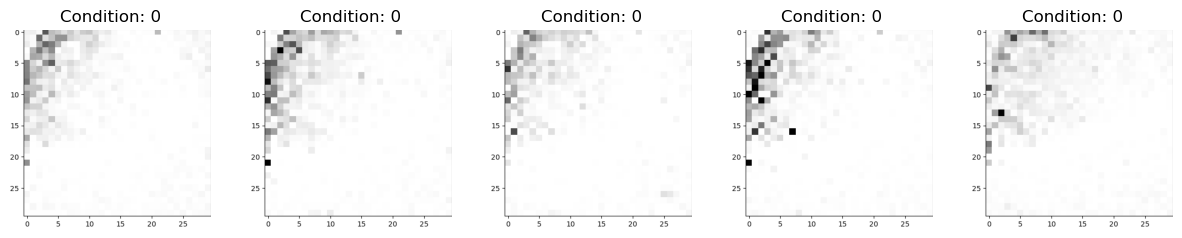

Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_2fa8c89c-893e-465a-aeb5-e3fb81a200c7.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_288d2dc8-9fb3-4164-8e6a-cee107d11404.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_7b97885a-f365-4f11-8f35-9bf17a7344b5.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_e32fc401-5ddd-4dfc-8be4-8d4072a080c3.rna_seq.augmented_star_gene_counts.tsv_image.png
Image Path: Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data/_unstranded_16eca87b-206a-4c2d-8ab7-f8c2fdb51b0e.rna_seq.augmented_star_gene_counts.tsv_image.png


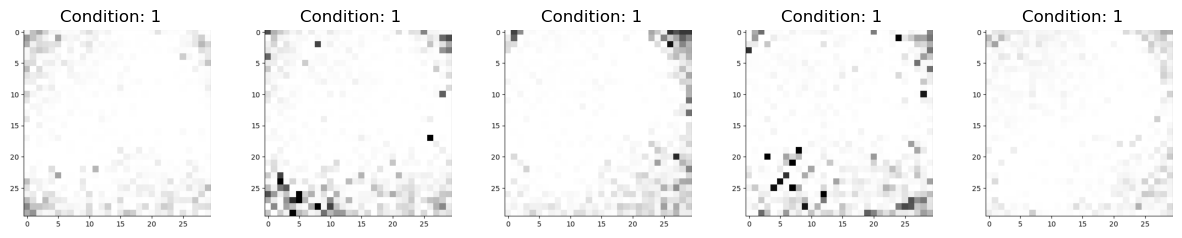

In [44]:
# plot few of the  generated images:

def plot_images(image_folder, df, condition_label, num_images=5):
    # Filter DataFrame based on condition label
    condition_df = df[df['Condition'] == condition_label].head(num_images)
    
    # Plot images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i, (sample_id, row) in enumerate(condition_df.iterrows()):
        # Add "_image" suffix to sample_id
        sample_id = f"_{sample_id}_image"
        
        # Construct image path
        image_path = os.path.join(image_folder, f"{sample_id}.png")
        
        print("Image Path:", image_path)  # Debug output
        
        # Check if image file exists
        if os.path.exists(image_path):
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].set_title(f"Condition: {condition_label}")
            axes[i].axis('off')
        else:
            print(f"Image file not found for sample ID: {sample_id}")
    
    #plt.tight_layout()
    plt.show()

# Assuming image folder contains the image files and df is your DataFrame
image_folder = 'Results/Table_To_Image_Conversion/Results_IGTD_PRAD_euclidean/data'
df = Condition_df

# Plot a few examples from condition 0 and condition 1
plot_images(image_folder, df, condition_label=0)
plot_images(image_folder, df, condition_label=1)
